In [1]:
%load_ext autoreload
%autoreload 2

from postprocess_kinematics import PostProcessKinematics

In [2]:
post_process = PostProcessKinematics()

## Illustrations of function usages

### loading bin mapping

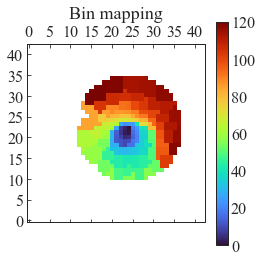

In [3]:
post_process.load_bin_mapping('../kcwi_extractions/extracted_dispersions/'
                              'voronoi_2d_binning_KCWI_RXJ1131_icubes_mosaic_0.1457_targetSN_15_output.txt',
                              plot=True);


### loading extracted velocity dispersion and get $v_{\rm rms}$

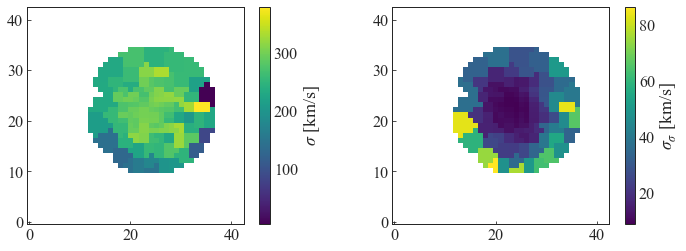

/Users/ajshajib/miniforge3/lib/python3.9/site-packages/plotbin/sauron_colormap.py:105: UserWarning: Trying to register the cmap 'sauron' which already exists.
  plt.register_cmap(cmap=sauron)
/Users/ajshajib/miniforge3/lib/python3.9/site-packages/plotbin/sauron_colormap.py:106: UserWarning: Trying to register the cmap 'sauron_r' which already exists.
  plt.register_cmap(cmap=sauron_r)


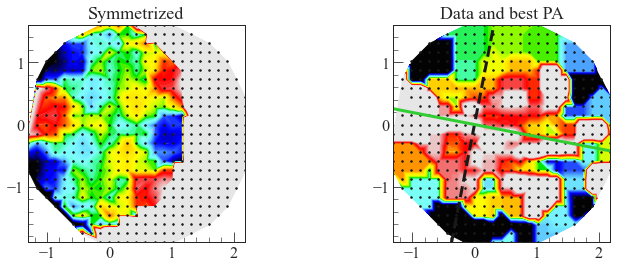

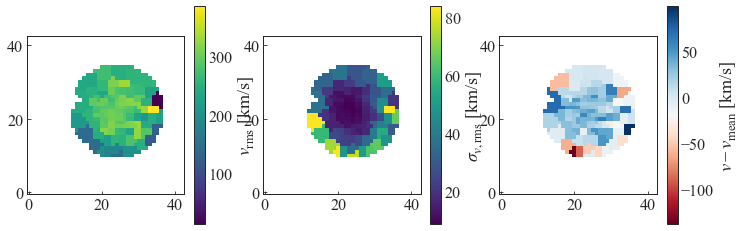

In [4]:
vd_name = 'wave_rng_2_deg_2_global_temp_2_quasar_sp_B_SN_15'

directory_measurements = "../kcwi_extractions/extracted_dispersions/"
object_name = "KCWI_RXJ1131_icubes_mosaic_0.1457"

VD_2d, dVD_2d, V_2d, dV_2d, fig = post_process.get_kinematics_maps(
                                directory_measurements, object_name+'_targetSN_15', 
                                radius_in_pixels=21,
                                vd_name=vd_name, 
                                vd_val=1000, plot=True)

v_rms, sigma_rms, fig = post_process.get_v_rms(directory_measurements, object_name+'_targetSN_15', 
                                          radius_in_pixels=21,
                                          vd_name=vd_name,
                                          vd_val=1000, 
                                          plot=True)


### load dynamical models 

In [45]:
software = 'jampy'
anisotropy_model = 'constant'
ellipticity_model = 'ell'
directory_models = '../{}_models'.format(software)

post_process.load_ifu_dynamical_models(software, anisotropy_model,
                                       ellipticity_model, directory_models,
                                       compute_chunk=250
                                      )

In [47]:
post_process.load_aperture_dynamical_model(anisotropy_model,
                                           ellipticity_model='sph',
                                           compute_chunk=1000)

### get $\lambda_{\rm MST}$ posterior

In [48]:
v_rms_measured, v_rms_sigma = post_process.get_binned_v_rms_measurements_and_uncertainty(
    directory_measurements, object_name+'_targetSN_15', 
    radius_in_pixels=21,
    vd_name=vd_name,
    vd_val=1000)

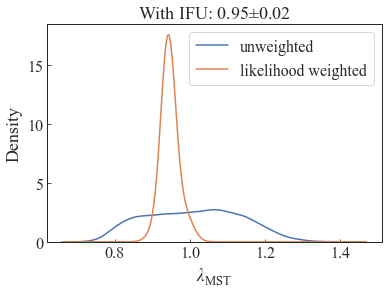

In [49]:
lambda_mst, likelihoods = post_process.get_lambda_mst_posterior(v_rms_measured, v_rms_sigma, plot=True)

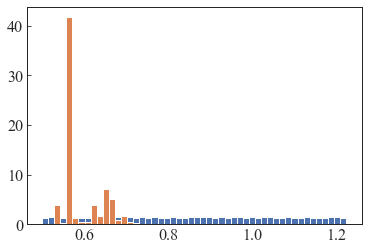

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.hist(post_process.dynamical_model_ifu.ani_param, density=True, bins=50) #, weights=likelihoods)
plt.hist(post_process.dynamical_model_ifu.ani_param, weights=likelihoods, bins=50, density=True);


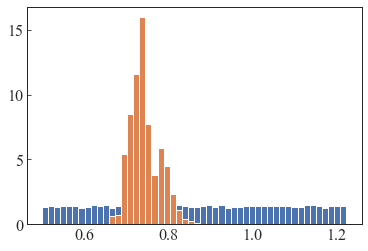

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.hist(post_process.dynamical_model_ifu.ani_param, density=True, bins=50) #, weights=likelihoods)
plt.hist(post_process.dynamical_model_ifu.ani_param, weights=likelihoods, bins=50, density=True);


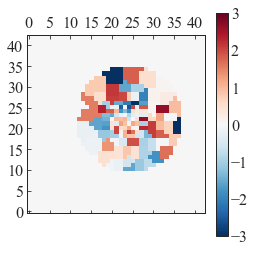

In [51]:
post_process.plot_v_rms_residual(lambda_mst, likelihoods, v_rms_measured, v_rms_sigma) #, model_index=2)

### corner plot for one single extraction

**not marginalized over velocity dispersion measurement systematics**

Power-law samples: (4, 21000)
Removed no burn in
Removed no burn in
Removed no burn in


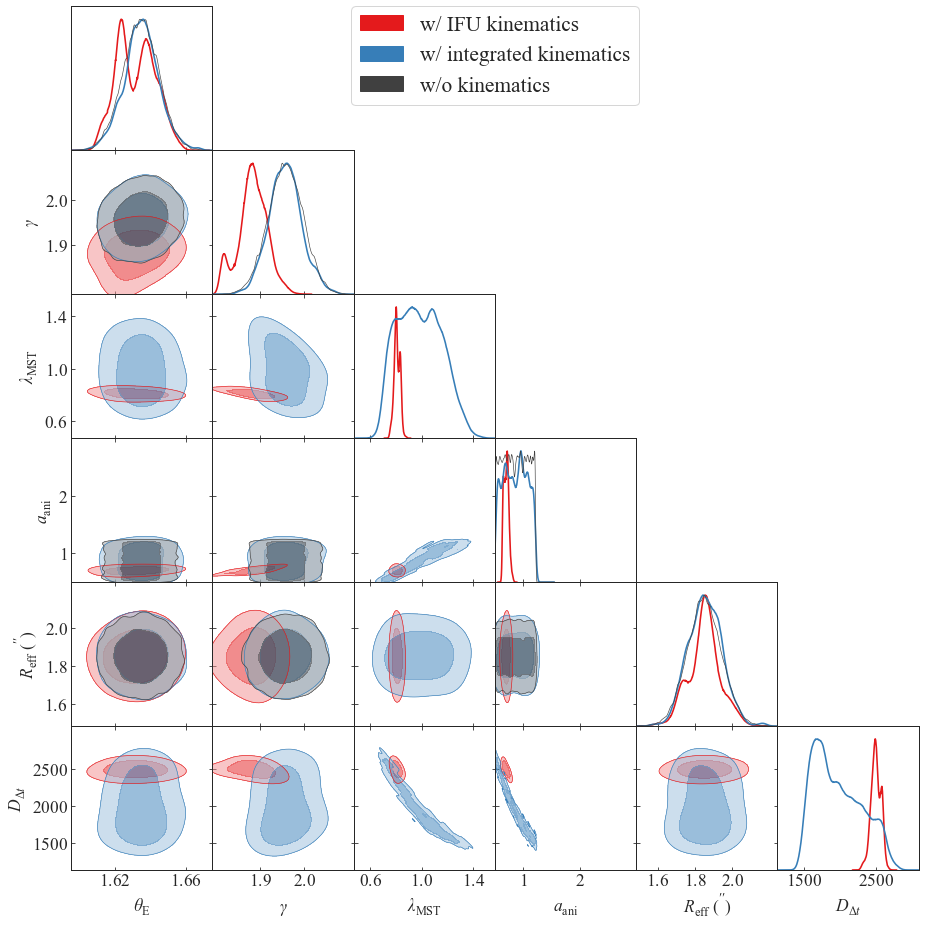

In [27]:
lambda_mst_aperture, likelihoods_aperture = post_process.get_lambda_mst_posterior(is_ifu=False)

corner_fig = post_process.plot_corner_plot(lambda_mst, likelihoods, lambda_mst_aperture, likelihoods_aperture)